# Machine Learning HW3 Simulation Part (2nd exercise)
## Amirmahdi Ansaripour (810198358)

In [255]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import copy

In [256]:
def scatter_points(centerX, centerY, minR, maxR, numOfPoints):
    X = np.zeros(numOfPoints)
    Y = np.zeros(numOfPoints)
    random.seed(0)
    for i in range(numOfPoints):
        angle = random.random() * 359
        radius = minR + (random.random() * (maxR - minR))
        X[i] = centerX + (radius * math.cos(angle))
        Y[i] = centerY + (radius * math.sin(angle))
    return X, Y


def plot_boundry(weights, x1, y1, x2, y2):
    f1 = np.linspace(-2, 2, 100)
    for weight in weights:
        y = (-weight[0]/weight[2]) + ((-weight[1]/weight[2]) * f1)
        plt.plot(f1, y)
    c1 = plt.scatter(x1, y1, color = "red")
    x2, y2 = scatter_points(0, 0, 1.3, 1.6, 100)
    c2 = plt.scatter(x2, y2, color = "orange")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])    
    plt.grid()
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.title("Dataset distribution")
    plt.legend((c1, c2), ("Class1", "Class2"))
    plt.show()

def plot(weights, xs, labels):
        A = [[], []]
        B = [[], []]
        for i in range(len(labels)):
            if labels[i] == 1:
                A[0].append(xs[i][0])
                A[1].append(xs[i][1])
            else:
                B[0].append(xs[i][0])
                B[1].append(xs[i][1])
        f1 = np.linspace(-1.5, 1.5, 100)
        print("intercept: ", -weights[0]/weights[2])
        print("slope: ", (-weights[1]/weights[2]))
        y = (-weights[0]/weights[2]) + ((-weights[1]/weights[2]) * f1)
        plt.plot(f1, y)
        plt.scatter(A[0], A[1], color = "red")
        plt.scatter(B[0], B[1], color = "orange")
        plt.xlabel("feature1")
        plt.ylabel("feature2")
        plt.title("dataset distribution")
        plt.legend((c1, c2), ("class1", "class2"))
        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        plt.show()

In [257]:
def calc_accuracy(weights, values, Y):
    correct = 0
    x = [[1, a[0], a[1]] for a in values]
    x = np.asarray(x)    
    preds = []
    for i in range(len(values)):
        in_area = True
        for j in range(len(weights)):
            sign = weights[j]@x[i].T
            if sign < 0:
                preds.append(-1)
                in_area = False
                break
        if in_area:
            preds.append(1)
    
    for i in range(len(Y)):
        if Y[i] == preds[i]:
            correct += 1
    return correct/len(Y)

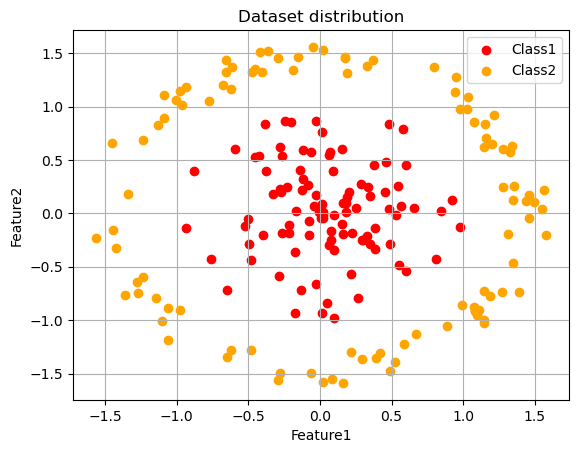

In [258]:
x1, y1 = scatter_points(0, 0, 0, 1, 100)
c1 = plt.scatter(x1, y1, color = "red")
x2, y2 = scatter_points(0, 0, 1.3, 1.6, 100)
c2 = plt.scatter(x2, y2, color = "orange")
plt.grid()
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Dataset distribution")
plt.legend((c1, c2), ("Class1", "Class2"))

### Part A (generating samples)
The task of this question is to seperate two sets of points which are shown in the above graph using MADALINE networks.

In [259]:
inp1 = [[x1[i], y1[i]] for i in range(len(x1))]
inp2 = [[x2[i], y2[i]] for i in range(len(x2))]
inp = inp1 + inp2
inp = np.asarray(inp)
label = [-1] * (len(x1) + len(x2))
for i in range(len(x1)):
    label[i] = 1   ## Red is class 1
label = np.asarray(label)

In [296]:
def set_three_tresholds():
    labels = [np.asarray(copy.deepcopy(label)) for i in range(3)]
    for i in range(len(x1), len(x1) + len(x2)):
        if inp[i][1] < -0.5 or (inp[i][1] > -0.5 and inp[i][0] > 0.5):
            labels[0][i] = 1
        if inp[i][1] > -1:
            labels[1][i] = 1
        if inp[i][1] < -0.5 or (inp[i][1] > -0.5 and inp[i][0] < 0.8):
            labels[2][i] = 1
    return labels

def set_six_tresholds():
    labels = [np.asarray(copy.deepcopy(label)) for i in range(6)]
    for i in range(len(x1), len(x1) + len(x2)):
        if inp[i][0] < 1.1:   # right side
            labels[0][i] = 1
        if inp[i][1] > -1.1:  # down side
            labels[1][i] = 1
        if inp[i][0] > -1: #left side
            labels[2][i] = 1
        if inp[i][1] < 1:
            labels[3][i] = 1
        if inp[i][1] < 0.5 or inp[i][0] < 0.5:
            labels[4][i] = 1
        if inp[i][0] < 0.5 or inp[i][1] > -0.5:
            labels[5][i] = 1
    return labels

In [297]:
class Madaline:
    def __init__(self):
        return

    def nueron(self, X, Y, epoch, lr):
        self.w = np.ones(X.shape[1] + 1)
        x = [[1, a[0], a[1]] for a in X]
        x = np.asarray(x)
        for i in range(epoch):
            z = self.w@x.T
            y_pred = np.sign(z)
            if np.array_equal(Y, y_pred): 
                break
            else:
                self.w = self.w + lr * ((Y - y_pred).T@x)
        return self.w 

### Part B: (classifying with a MADALINE consisting of three neurons)
As it is shown in the following graph, by setting proper tresholds for each perceptron, we have obtained a relatively acceptable accuracy of 0.87.

Pay attention that for each perceptron we have:

$$ \hat{y} = 

\begin{cases}
    \text{1} &\quad\text{if } \vec{w}^T\vec{x} \ge \text{threshold}\\
    \text{0} &\quad\text{o.w.} \\
\end{cases}

$$

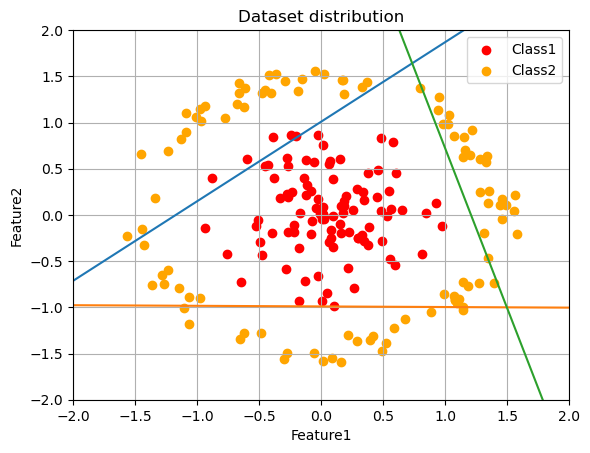

Model accuracy:  0.875


In [298]:
mad = Madaline()
tresholds = set_three_tresholds()
weights = []
for treshold in tresholds:
    weights.append(mad.nueron(inp, treshold, 500, 0.1))
# plot(weights[0], inp, label1)
plot_boundry(weights, x1, y1, x2, y2)
acc = calc_accuracy(weights, inp, label)
print("Model accuracy: ", acc)

### Part C (classifying with a MADALINE consisting of six neurons):
Obviously, by adding more neurons, we can seperate red points from others more suitably. As a result, a higher accuracy (nearly 100%) is achieved through using six decision boundries.

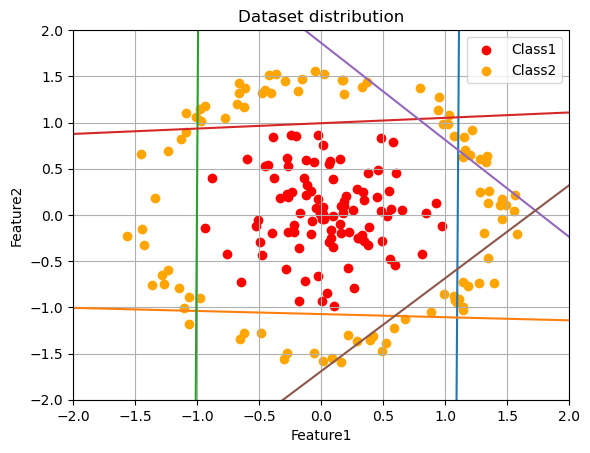

Model accuracy:  0.995


In [299]:
tresholds = set_six_tresholds()
weights = []
for treshold in tresholds:
    weights.append(mad.nueron(inp, treshold, 500, 0.1))
# plot(weights[4], inp, label1)
plot_boundry(weights, x1, y1, x2, y2)
acc = calc_accuracy(weights, inp, label)
print("Model accuracy: ", acc)